In [23]:
using QuantumDynamics
using Plots

In [24]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254

0.02418884254

In [25]:
threshold = 1e-10
nsteps = 1000 
N = 4
β = 1 / (300 * 3.16683e-6)

Jw = SpectralDensities.DrudeLorentz(; λ=100.0*invcm2au, γ=50.0*invcm2au, Δs=1.0)

QuantumDynamics.SpectralDensities.DrudeLorentz(0.00045563300000000005, 0.00022781650000000002, 1.0, 0.22781650000000003, false)

In [26]:
dt = 100 / au2fs

4134.137457575099

In [27]:
ϵb = 600 * invcm2au

H0 = Matrix{ComplexF64}(zeros(N, N))
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[1, 1] = 1.0 

for i in 1:N
    if i <= N-1
        H0[i, i+1] = ϵb
    end
    if i >= 2
        H0[i, i-1] = ϵb
    end
end
H0

4×4 Matrix{ComplexF64}:
       0.0+0.0im  0.0027338+0.0im        0.0+0.0im        0.0+0.0im
 0.0027338+0.0im        0.0+0.0im  0.0027338+0.0im        0.0+0.0im
       0.0+0.0im  0.0027338+0.0im        0.0+0.0im  0.0027338+0.0im
       0.0+0.0im        0.0+0.0im  0.0027338+0.0im        0.0+0.0im

In [28]:
sys_ops = Vector{Matrix{ComplexF64}}()

λs = repeat([35.0], 4) * invcm2au
γs = 1 ./ (repeat([50.0], 4) ./ au2fs)
JwD = Vector{SpectralDensities.DrudeLorentz}()
sys_ops = Vector{Matrix{ComplexF64}}()

for (j, (λ, γ)) in enumerate(zip(λs, γs)) 
    push!(JwD, SpectralDensities.DrudeLorentz(; λ, γ, Δs=1.0))
    op = zeros(N, N)
    op[j, j] = 1.0
    push!(sys_ops, op)
end

In [29]:
th, ρh = HEOM.propagate(; Hamiltonian=H0, ρ0=ρ0, Jw=JwD, β=β, ntimes=nsteps, dt=dt, sys_ops=sys_ops, num_modes=2, Lmax=3, scaled=true, threshold=1e-10, extraargs=Utilities.DiffEqArgs(; reltol=1e-6, abstol=1e-6))

LoadError: InterruptException:

In [30]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)
t, ρ = TTM.propagate(; fbU=fbU, Jw=[Jw], β=β, ρ0=ρ0, dt=dt, ntimes=nsteps, rmax=1, extraargs=QuAPI.QuAPIArgs(), path_integral_routine=QuAPI.build_augmented_propagator)

LoadError: InterruptException:

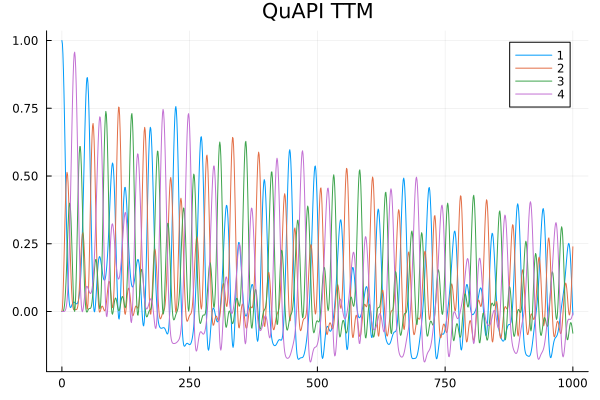

In [31]:
plot(t.*au2fs, real.(ρ[:, 1,1]), label="1")
plot!(t.*au2fs, real.(ρ[:, 2,2]), label="2")
plot!(t.*au2fs, real.(ρ[:, 3,3]), label="3")
plot!(t.*au2fs, real.(ρ[:, 4,4]), title = "QuAPI TTM", label="4")

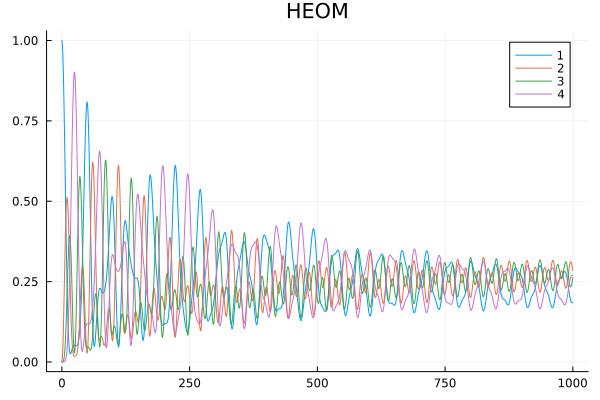

In [32]:
plot(th.*au2fs, real.(ρh[:, 1,1]), label="1")
plot!(th.*au2fs, real.(ρh[:, 2,2]), label="2")
plot!(th.*au2fs, real.(ρh[:, 3,3]), label="3")
plot!(th.*au2fs, real.(ρh[:, 4,4]), title = "HEOM", label="4")